In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('Rf_data.csv')

In [4]:
df.head()

,budget,runtime,vote_average,vote_count,popularity,release_year,release_month,roi,primary_genre,revenue
0,30000000.0,81.0,7.7,5415.0,21.946943,1995.0,10.0,11.451801,Animation,373554033.0
1,65000000.0,104.0,6.9,2413.0,17.015539,1995.0,12.0,3.043035,Adventure,262797249.0
2,16000000.0,127.0,6.1,34.0,3.859495,1995.0,12.0,4.090760,Comedy,81452156.0
3,60000000.0,170.0,7.7,1886.0,17.924927,1995.0,12.0,2.123947,Action,187436818.0
4,35000000.0,106.0,5.5,174.0,5.231580,1995.0,12.0,0.838576,Action,64350171.0


In [5]:
df.dtypes

budget           float64
runtime          float64
vote_average     float64
vote_count       float64
popularity       float64
release_year     float64
release_month    float64
roi              float64
primary_genre     object
revenue          float64
dtype: object

In [6]:
df.isnull().sum()

budget            0
runtime           1
vote_average      0
vote_count        0
popularity        0
release_year      0
release_month     0
roi               0
primary_genre    11
revenue           0
dtype: int64

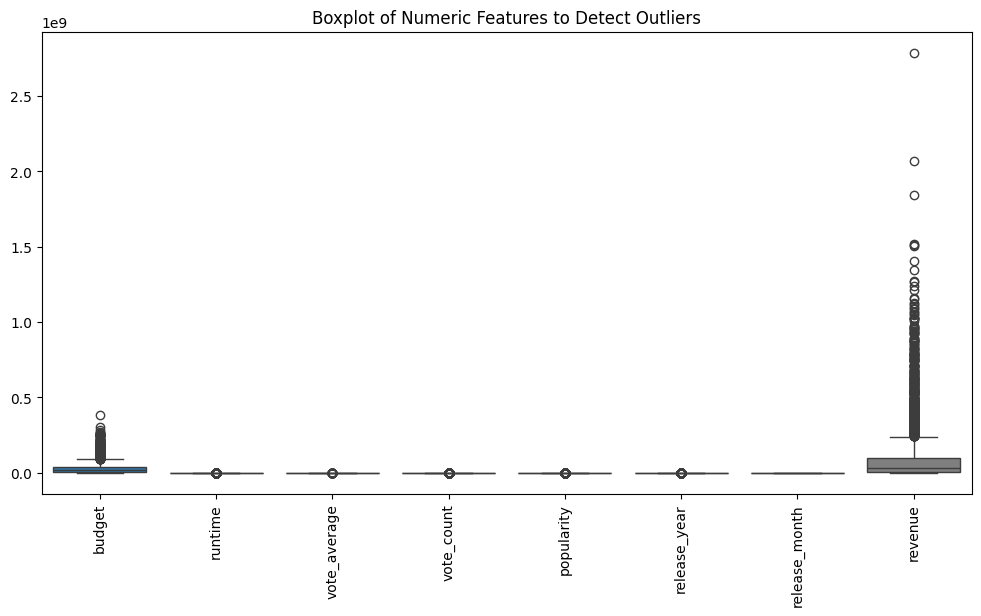

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['budget','runtime','vote_average','vote_count', 'popularity','release_year','release_month','revenue']])
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Features to Detect Outliers')
plt.show()

# Removing oulires 

In [8]:
num_cols = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity', 'release_year','roi', 'release_month', 'revenue']

In [9]:
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

In [10]:
outlires = ((df[num_cols] < (q1 - 1.5 * iqr)) | (df[num_cols] > (q3 + 1.5 * iqr))).sum()

In [11]:
outlires

budget           401
runtime          190
vote_average      61
vote_count       545
popularity       199
release_year     292
roi              479
release_month      0
revenue          533
dtype: int64

In [12]:
df = df[~((df[num_cols] < (q1 - 1.5 * iqr)) | (df[num_cols] > (q3 + 1.5 * iqr))).any(axis=1)]

In [13]:
df.shape

(3719, 10)

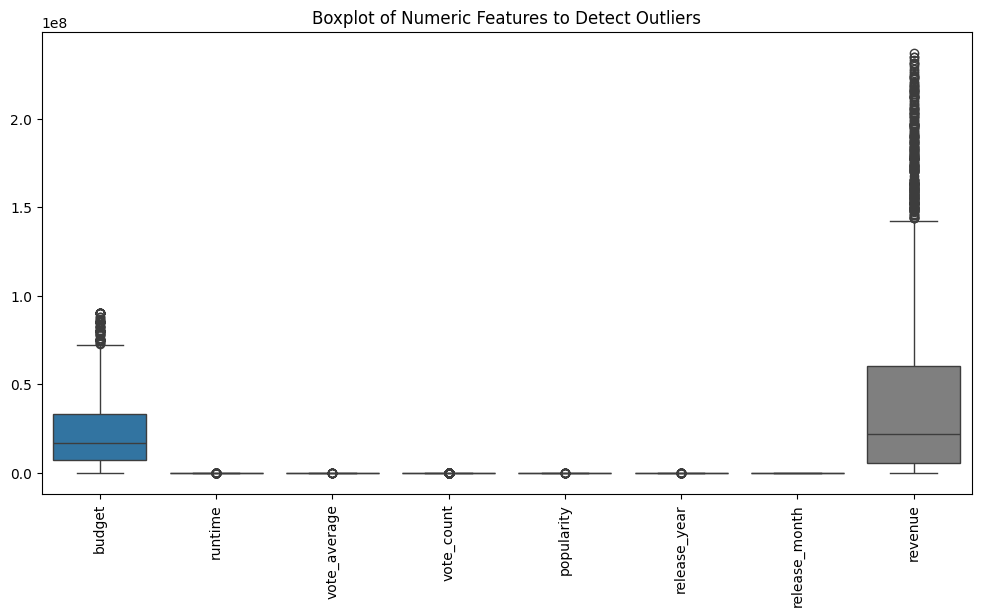

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['budget','runtime','vote_average','vote_count', 'popularity','release_year','release_month','revenue']])
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Features to Detect Outliers')
plt.show()

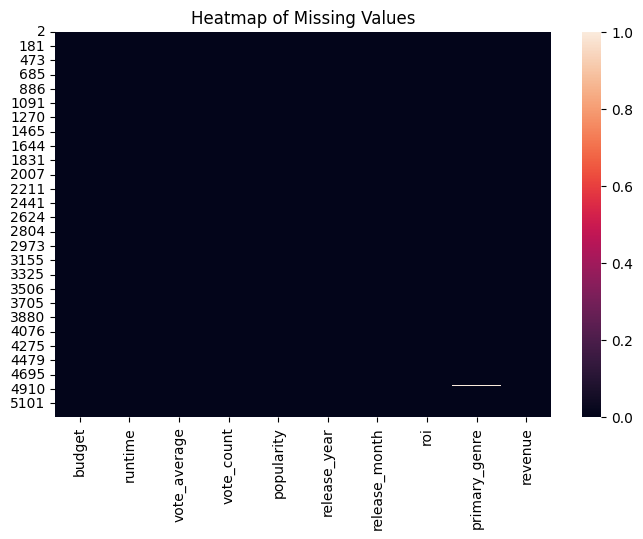

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull())
plt.title("Heatmap of Missing Values")
plt.show()

visualization

In [16]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix_with_revenue = correlation_matrix['revenue'].sort_values(ascending = False)
correlation_matrix_with_revenue

revenue          1.000000
budget           0.626603
vote_count       0.583181
roi              0.474276
popularity       0.386225
runtime          0.113680
release_year     0.046160
release_month    0.038605
vote_average     0.032811
Name: revenue, dtype: float64

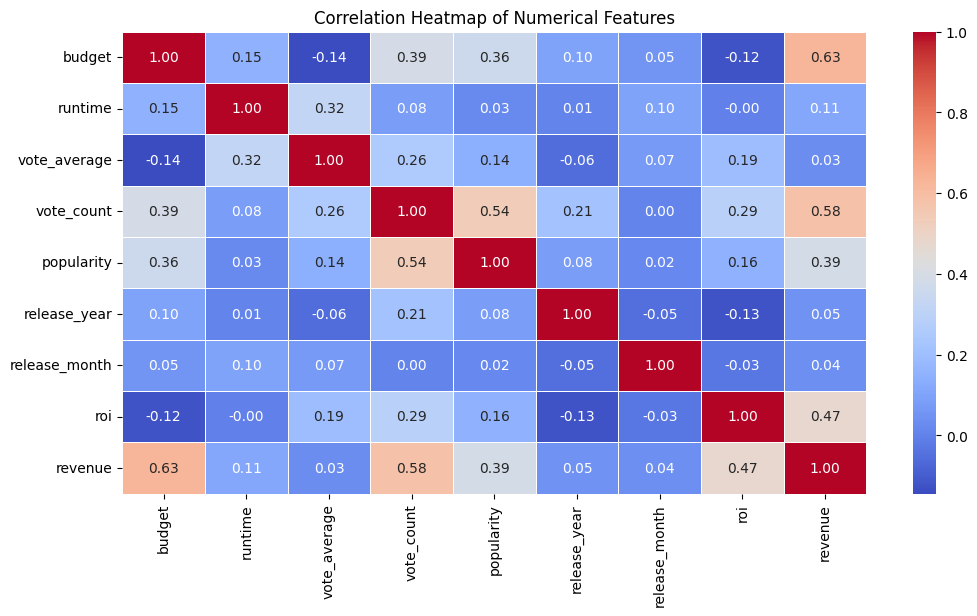

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


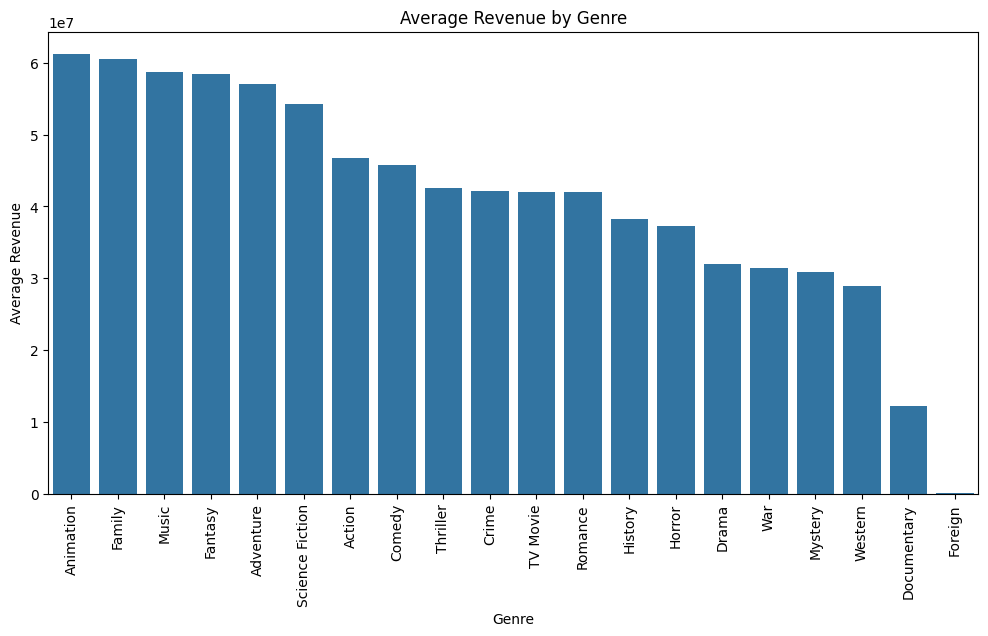

In [18]:
genre_revenue = df.groupby('primary_genre')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values)
plt.xticks(rotation=90)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.show()

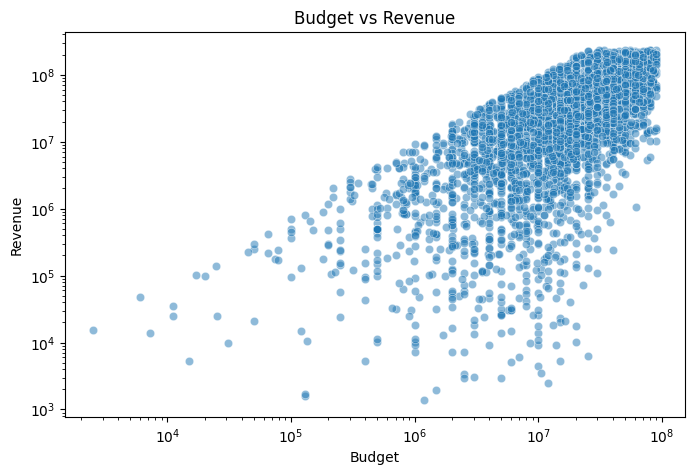

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['vote_count'], y=df['revenue'], alpha=0.5)
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

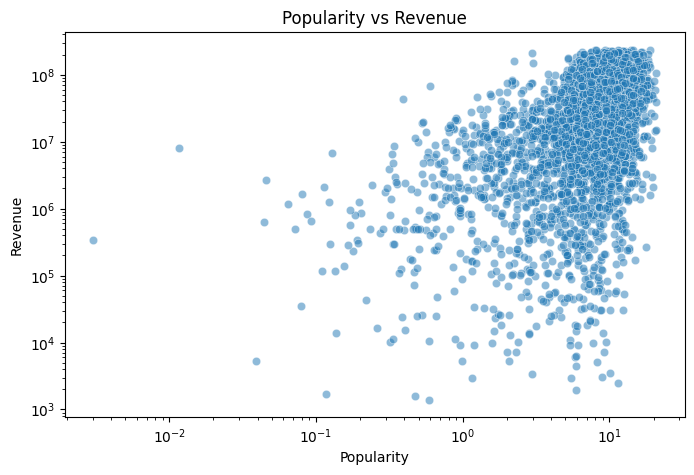

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['popularity'], y=df['revenue'], alpha=0.5)
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['primary_genre'])

In [ ]:
genre_columns = [col for col in df.columns if col.startswith("primary_genre_")]

In [ ]:
df.head()

,budget,runtime,vote_average,vote_count,popularity,release_year,release_month,roi,revenue,primary_genre_Action,...,primary_genre_History,primary_genre_Horror,primary_genre_Music,primary_genre_Mystery,primary_genre_Romance,primary_genre_Science Fiction,primary_genre_TV Movie,primary_genre_Thriller,primary_genre_War,primary_genre_Western
2,16000000.0,127.0,6.1,34.0,3.859495,1995.0,12.0,4.090760,81452156.0,False,...,False,False,False,False,False,False,False,False,False,False
4,35000000.0,106.0,5.5,174.0,5.231580,1995.0,12.0,0.838576,64350171.0,True,...,False,False,False,False,False,False,False,False,False,False
6,62000000.0,106.0,6.5,199.0,6.318445,1995.0,11.0,0.739992,107879496.0,False,...,False,False,False,False,False,False,False,False,False,False
10,16500000.0,136.0,7.2,364.0,10.673167,1995.0,12.0,7.181818,135000000.0,False,...,False,False,False,False,False,False,False,False,False,False
11,4000000.0,98.0,6.5,539.0,9.026586,1995.0,12.0,0.075000,4300000.0,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop(columns=['revenue'])
y = df['revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

R-squared: 0.9971818373129863
Mean Absolute Error: 1263080.1146774194
Root Mean Squared Error: 2580851.510394569


In [ ]:
import pickle as pk

In [ ]:
with open('rf_model.pkl', 'wb') as file:
    pk.dump(rf_model, file)

In [ ]:
with open('feature_names.pkl', 'wb') as file:
    pk.dump(X.columns.tolist(), file)